# Table of Contents
[Introduction](#Introduction).

[Project_stages](#Project_stages).


1. [Data_Gathering](#Data_Gathering).

2. [Data_Assessment](#Data_Assessment).

3. [Data_Cleaning](#Data_Cleaning).

[Visualization_and_reporting](#Visualization_and_reporting).






# Introduction

Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

# Project_stages

This project will go through 3 stages (Gathering, Assessing and Cleaning) in order to gain a clean and combined dataset and identify at least eight quality issues and two tidiness issues. 
* Data wrangling, which consists of:

1- Gathering data.

2- Assessing data.

3- Cleaning data.

* Storing, analyzing, and visualizing your wrangled data.

* Reporting on:

1- your data wrangling efforts.

2- your data analyses and visualizations.

# Gathering Data

### 1) Enhanced Twitter Archive
The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: [twitter_archive_enhanced.csv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)

### 2) Image Predictions File
The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. [image_predictions.tsv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)

### 3) Additional Data via the Twitter API
Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called [tweet_json.txt](https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt) file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

# Data Wrangling

In [371]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
import os
import seaborn as sns
from timeit import default_timer as timer
%matplotlib inline

1. # Data_Gathering

## Loading Data

### 1- Load Enhanced Twitter Archive

In [372]:
# load twitter-archive-enhanced dataframe
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv', encoding="utf-8")
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2) Load image-predictions

In [373]:
#Load and create a dataframe
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_prediction.tsv', 'wb') as file:
    file.write(response.content)
image_predictions = pd.read_csv('image_prediction.tsv', sep='\t')

image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [51]:
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

Because the process of obtaining a developer account and extracting tweets using twitter API takes time the previous code will not be excuted and since we have the json file already created and provided by Udacity we will just read the file and load the required data then create a dataframe.

### 3) Reading tweet json file

In [375]:
df_tweets = pd.read_json('tweet_json.txt', lines = True, encoding='utf-8')
df_tweets

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [376]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [377]:
# Extract data and append it to a list
df_list = []
with open('tweet_json.txt') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        keys = json_data.keys()
        tweet_id = json_data.get('id')
        retweet_count = json_data.get('retweet_count')
        favorite_count = json_data.get('favorite_count')
        
        df_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

In [378]:
tweet_counts = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])
tweet_counts.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


Now we have the three dataset gathered and ready for assessment.
* twitter_archive
* image_predictions
* tweet_counts

Make copies of the data frames to conduct cleaning process on them. 

In [379]:
clean_twitter_archive = twitter_archive.copy()
clean_image_predictions = image_predictions.copy()
clean_tweet_counts = tweet_counts.copy()

2. # Data_Assessment

* **Assessing (clean_twitter_archive) dataset.**

In [380]:
clean_twitter_archive.shape

(2356, 17)

In [381]:
clean_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [382]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [383]:
clean_twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [384]:
clean_twitter_archive.query('rating_denominator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [385]:
len(clean_twitter_archive.query('rating_numerator < 10'))

440

In [386]:
clean_twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Shawwn       1
Tino         1
Howie        1
Keet         1
Suki         1
Name: name, Length: 957, dtype: int64

* **Assessing (clean_image_predictions) dataset.**

In [387]:
clean_image_predictions.shape

(2075, 12)

In [388]:
clean_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [389]:
clean_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [390]:
clean_image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [391]:
clean_image_predictions.duplicated().sum()

0

* **Assessing (clean_tweet_counts) dataset.**

In [392]:
clean_tweet_counts.shape

(2354, 3)

In [393]:
clean_tweet_counts

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [395]:
clean_tweet_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues
**clean_twitter_archive table**

1- The table includes retweets and replies while we need only original tweets.

2- Most of the values in the columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp) are missing and there is no interest to have these columns in our analysis.

3- Wrong data type (timestamp).

4- tweet_id in the type of int instead of object in all tables.

5- rating_denominator column includes values with 0 while it shold not.

6- rating_numerator column includes values less than 10 while it should not.

7- name column includes values with "None"

**clean_image_predictions table**

8- Some of the data in the colmns p1, p2, p3 in uppercase and some in lowercase.

9-The columns names p1, p2, p3 are not descriptive. 


### Tidiness issues

10- doggo, floofer, pupper, puppo in seperated columns in the twitter_archive table.

11- All tables are separated and must be merged together.


3. # Data_Cleaning

#### Define

1- The table includes retweets and replies while we need only original tweets.Rmove the rows those are not original tweets.

#### Code

In [396]:
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive.retweeted_status_id.isnull()]

#### Test

In [397]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#### Define

2- Most of the values in the columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls ) in twitter_archive table are missing and there is no interest to have these columns in our analysis. Remove them. 


#### Code

In [398]:
clean_twitter_archive.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1, inplace=True)

C:\Users\gad17\anaconda3\lib\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Test

In [399]:
clean_twitter_archive.sample()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1412,698953797952008193,2016-02-14 19:35:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet CeCe. She wanted to take a selfie before ...,11,10,CeCe,None,None,None,None


In [400]:
clean_twitter_archive.shape[1]

11

#### Define

3- Wrong data types.(timestamp). Change the type. 

#### Code

In [401]:
clean_twitter_archive['timestamp'] = pd.to_datetime(clean_twitter_archive['timestamp'])               

<ipython-input-401-0e046dc260a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_twitter_archive['timestamp'] = pd.to_datetime(clean_twitter_archive['timestamp'])


#### Test

In [402]:
clean_twitter_archive['timestamp']

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2175, dtype: datetime64[ns, UTC]

#### Define

4- tweet_id in the type of int instead of object in all tables. Change them all.

#### Code

In [403]:
clean_twitter_archive['tweet_id'] = clean_twitter_archive.tweet_id.astype(object)
clean_image_predictions['tweet_id'] = clean_image_predictions.tweet_id.astype(object)
clean_tweet_counts['tweet_id'] = clean_tweet_counts.tweet_id.astype(object)

<ipython-input-403-9b43f86c7736>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_twitter_archive['tweet_id'] = clean_twitter_archive.tweet_id.astype(object)


#### Test

In [404]:
clean_twitter_archive['tweet_id'], clean_image_predictions['tweet_id'], clean_tweet_counts['tweet_id']

(0       892420643555336193
 1       892177421306343426
 2       891815181378084864
 3       891689557279858688
 4       891327558926688256
                ...        
 2351    666049248165822465
 2352    666044226329800704
 2353    666033412701032449
 2354    666029285002620928
 2355    666020888022790149
 Name: tweet_id, Length: 2175, dtype: object,
 0       666020888022790149
 1       666029285002620928
 2       666033412701032449
 3       666044226329800704
 4       666049248165822465
                ...        
 2070    891327558926688256
 2071    891689557279858688
 2072    891815181378084864
 2073    892177421306343426
 2074    892420643555336193
 Name: tweet_id, Length: 2075, dtype: object,
 0       892420643555336193
 1       892177421306343426
 2       891815181378084864
 3       891689557279858688
 4       891327558926688256
                ...        
 2349    666049248165822465
 2350    666044226329800704
 2351    666033412701032449
 2352    666029285002620928
 2353    666

#### Define

5- rating_denominator column includes values with 0 while it should not. Remove it.

#### Code

In [405]:
clean_twitter_archive.loc[clean_twitter_archive['rating_denominator'] == 0,'rating_denominator'] = np.nan

C:\Users\gad17\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [406]:
clean_twitter_archive.dropna(inplace=True)

<ipython-input-406-16cca0ac2008>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_twitter_archive.dropna(inplace=True)


#### Test

In [407]:
len(clean_twitter_archive.query('rating_denominator == 0'))

0

#### Define

6- rating_numerator column includes values less than 10 while it should not. Reset all values less than 10 to be equal to 10.


#### Code

In [408]:
clean_twitter_archive.loc[clean_twitter_archive['rating_numerator'] < 10,'rating_numerator'] = 10

C:\Users\gad17\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


#### Test

In [409]:
len(clean_twitter_archive.query('rating_numerator < 10'))

0

In [424]:
clean_twitter_archive[clean_twitter_archive.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\gad17\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,10.0
695,"This is Logan, the Chow who lived. He solemnly...",75.0
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0
1689,I've been told there's a slight possibility he...,10.0
1712,Here we have uncovered an entire battalion of ...,26.0


In [425]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2174 non-null   object             
 1   timestamp           2174 non-null   datetime64[ns, UTC]
 2   source              2174 non-null   object             
 3   text                2174 non-null   object             
 4   rating_numerator    2174 non-null   float64            
 5   rating_denominator  2174 non-null   int32              
 6   name                1495 non-null   object             
 7   dog_stage           344 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int32(1), object(5)
memory usage: 144.4+ KB


In [411]:
#change data type of rating_numerator to (float) and rating_denominator to (int)
clean_twitter_archive['rating_numerator'] = clean_twitter_archive.rating_numerator.astype(float)
clean_twitter_archive['rating_denominator'] = clean_twitter_archive.rating_denominator.astype(int)

<ipython-input-411-2a565c537dae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_twitter_archive['rating_numerator'] = clean_twitter_archive.rating_numerator.astype(float)
<ipython-input-411-2a565c537dae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_twitter_archive['rating_denominator'] = clean_twitter_archive.rating_denominator.astype(int)


In [412]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2174 non-null   object             
 1   timestamp           2174 non-null   datetime64[ns, UTC]
 2   source              2174 non-null   object             
 3   text                2174 non-null   object             
 4   rating_numerator    2174 non-null   float64            
 5   rating_denominator  2174 non-null   int32              
 6   name                2174 non-null   object             
 7   doggo               2174 non-null   object             
 8   floofer             2174 non-null   object             
 9   pupper              2174 non-null   object             
 10  puppo               2174 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int32(1), object(8)
memory usage: 195.3+ KB


#### Define

7- name column includes values with "None". Replace them with NaN.

#### Code

In [413]:
clean_twitter_archive.loc[clean_twitter_archive['name'] == "None",'name'] = np.nan

#### Test

In [414]:
len(clean_twitter_archive.query('name == "None"'))

0

#### Define

8- Some of the data in the colmns p1, p2, p3 in uppercase and some in lowercase. Change them all to uppercase. 

#### Code

In [415]:
clean_image_predictions['p1'] = clean_image_predictions['p1'].str.upper()
clean_image_predictions['p2'] = clean_image_predictions['p2'].str.upper()
clean_image_predictions['p3'] = clean_image_predictions['p3'].str.upper()

#### Test

In [416]:
clean_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,WELSH_SPRINGER_SPANIEL,0.465074,True,COLLIE,0.156665,True,SHETLAND_SHEEPDOG,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,REDBONE,0.506826,True,MINIATURE_PINSCHER,0.074192,True,RHODESIAN_RIDGEBACK,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,GERMAN_SHEPHERD,0.596461,True,MALINOIS,0.138584,True,BLOODHOUND,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,RHODESIAN_RIDGEBACK,0.408143,True,REDBONE,0.360687,True,MINIATURE_PINSCHER,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,MINIATURE_PINSCHER,0.560311,True,ROTTWEILER,0.243682,True,DOBERMAN,0.154629,True


#### Define

9-The columns names p1, p2, p3 are not descriptive. Change them to more descriptive names. 

#### Code

In [417]:
clean_image_predictions = clean_image_predictions.rename(columns={'p1':'prediction_1', 'p2':'prediction_2', 'p3':'prediction_3'})

#### Test

In [418]:
clean_image_predictions.sample()

,tweet_id,jpg_url,img_num,prediction_1,p1_conf,p1_dog,prediction_2,p2_conf,p2_dog,prediction_3,p3_conf,p3_dog
1403,769212283578875904,https://pbs.twimg.com/media/CqzKfQgXEAAWIY-.jpg,1,GOLDEN_RETRIEVER,0.166538,True,PEKINESE,0.148215,True,COCKER_SPANIEL,0.082735,True


#### Define

10- doggo, floofer, pupper, puppo in seperated columns. Add another column for Dog class and remove the seperated columns.

#### Code

In [419]:
# handle none
clean_twitter_archive.doggo.replace('None', '', inplace=True)
clean_twitter_archive.floofer.replace('None', '', inplace=True)
clean_twitter_archive.pupper.replace('None', '', inplace=True)
clean_twitter_archive.puppo.replace('None', '', inplace=True)

# merge into column
clean_twitter_archive['dog_stage'] = clean_twitter_archive.doggo + clean_twitter_archive.floofer + clean_twitter_archive.pupper + clean_twitter_archive.puppo

# handle multiple stages
clean_twitter_archive.loc[clean_twitter_archive.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
clean_twitter_archive.loc[clean_twitter_archive.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
clean_twitter_archive.loc[clean_twitter_archive.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
clean_twitter_archive.loc[clean_twitter_archive.dog_stage == '', 'dog_stage'] = np.nan

C:\Users\gad17\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-419-3df7af50f9fb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_twitter_archive['dog_stage'] = clean_twitter_archive.doggo + clean_twitter_archive.floofer + clean_twitter_archive.pupper + clean_twitter_archive.puppo
C:\Users\gad17\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [422]:
clean_twitter_archive = clean_twitter_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)


#### Test

In [423]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2174 non-null   object             
 1   timestamp           2174 non-null   datetime64[ns, UTC]
 2   source              2174 non-null   object             
 3   text                2174 non-null   object             
 4   rating_numerator    2174 non-null   float64            
 5   rating_denominator  2174 non-null   int32              
 6   name                1495 non-null   object             
 7   dog_stage           344 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int32(1), object(5)
memory usage: 144.4+ KB


#### Define

11- All tables are separated and must be merged together. Merge them all on "tweet_id".

#### Code

In [426]:
clean_merged = clean_twitter_archive.merge(clean_image_predictions.merge(clean_tweet_counts, on='tweet_id'), on='tweet_id')

#### Test

In [427]:
clean_merged

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,prediction_2,p2_conf,p2_dog,prediction_3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,BAGEL,0.085851,False,BANANA,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,PEKINESE,0.090647,True,PAPILLON,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,MALAMUTE,0.078253,True,KELPIE,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,LABRADOR_RETRIEVER,0.168086,True,SPATULA,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,ENGLISH_SPRINGER,0.225770,True,GERMAN_SHORT-HAIRED_POINTER,0.175219,True,9774,41048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,10.0,10,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,...,0.560311,True,ROTTWEILER,0.243682,True,DOBERMAN,0.154629,True,41,111
1990,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,10.0,10,a,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,...,0.408143,True,REDBONE,0.360687,True,MINIATURE_PINSCHER,0.222752,True,147,311
1991,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,10.0,10,a,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,...,0.596461,True,MALINOIS,0.138584,True,BLOODHOUND,0.116197,True,47,128
1992,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,10.0,10,a,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,...,0.506826,True,MINIATURE_PINSCHER,0.074192,True,RHODESIAN_RIDGEBACK,0.072010,True,48,132


In [428]:
clean_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   rating_numerator    1994 non-null   float64            
 5   rating_denominator  1994 non-null   int32              
 6   name                1448 non-null   object             
 7   dog_stage           306 non-null    object             
 8   jpg_url             1994 non-null   object             
 9   img_num             1994 non-null   int64              
 10  prediction_1        1994 non-null   object             
 11  p1_conf             1994 non-null   float64            
 12  p1_dog              1994 non-null 

In [429]:
clean_merged.isnull().sum()

tweet_id                 0
timestamp                0
source                   0
text                     0
rating_numerator         0
rating_denominator       0
name                   546
dog_stage             1688
jpg_url                  0
img_num                  0
prediction_1             0
p1_conf                  0
p1_dog                   0
prediction_2             0
p2_conf                  0
p2_dog                   0
prediction_3             0
p3_conf                  0
p3_dog                   0
retweet_count            0
favorite_count           0
dtype: int64

In [430]:
clean_merged.duplicated().sum()

0

In [431]:
clean_merged.to_csv('twitter_archive_master.csv', index=False)

In [432]:
clean_merged = pd.read_csv('twitter_archive_master.csv')
clean_merged.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,prediction_2,p2_conf,p2_dog,prediction_3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,BAGEL,0.085851,False,BANANA,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,PEKINESE,0.090647,True,PAPILLON,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,MALAMUTE,0.078253,True,KELPIE,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,LABRADOR_RETRIEVER,0.168086,True,SPATULA,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,ENGLISH_SPRINGER,0.225770,True,GERMAN_SHORT-HAIRED_POINTER,0.175219,True,9774,41048


# Visualization_and_reporting

In [434]:
clean_merged.dog_stage.value_counts()

pupper            203
doggo              63
puppo              22
doggo, pupper       9
floofer             7
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

Text(0, 0.5, 'Number of tweets')

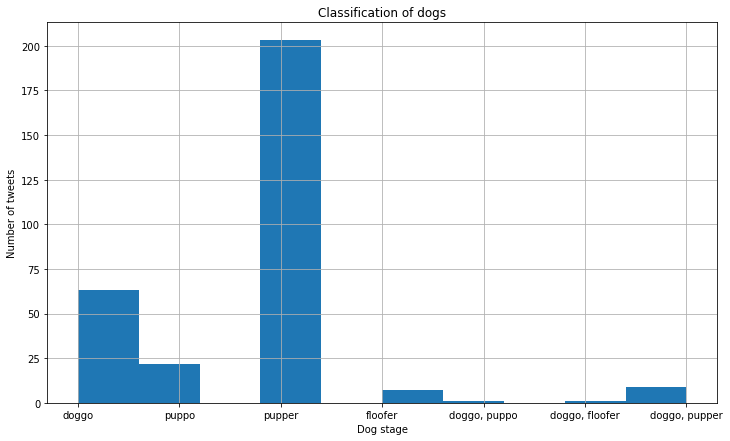

In [440]:
clean_merged.dog_stage.hist(figsize=(12,7))
plt.title('Classification of dogs')
plt.xlabel('Dog stage')
plt.ylabel('Number of tweets')

In [441]:
clean_merged.groupby('dog_stage')['rating_numerator'].value_counts()

dog_stage       rating_numerator
doggo           13.0                19
                11.0                16
                12.0                12
                10.0                 9
                14.0                 7
doggo, floofer  11.0                 1
doggo, pupper   12.0                 5
                10.0                 2
                11.0                 1
                13.0                 1
doggo, puppo    13.0                 1
floofer         13.0                 3
                12.0                 2
                10.0                 1
                11.0                 1
pupper          10.0                86
                11.0                50
                12.0                47
                13.0                12
                14.0                 7
                27.0                 1
puppo           13.0                 9
                12.0                 6
                10.0                 4
                11.0           

Looking at the visualization above, it's obvious that the dog class "pupper" is the most common class among the classification of dogs and when we go deeper and look at the number of tweets ratings  we can conclude that most of the bad rated dogs "10" that equal to 88 tweets are classified under the dog class "pupper" while the most of the good rated dogs "14" are equally distributed between two classes "doggo" and "pupper" and some have multiple classes of dogs for example: one has "doggo, floofer" class, five have "doggo, pupper" and one has "doggo, puppo" class. 

In [359]:
clean_merged.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03,1994.000000,1994.000000
mean,7.358508e+17,12.860582,10.532096,1.203109,0.593941,1.344195e-01,6.024848e-02,2766.753260,8895.725677
std,6.747816e+16,41.431360,7.320710,0.560777,0.271954,1.006807e-01,5.089067e-02,4674.698447,12213.193181
min,6.660209e+17,10.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,6.758475e+17,10.000000,10.000000,1.000000,0.362857,5.393988e-02,1.619283e-02,624.750000,1982.000000
50%,7.084748e+17,11.000000,10.000000,1.000000,0.587635,1.174550e-01,4.950530e-02,1359.500000,4136.000000
75%,7.877873e+17,12.000000,10.000000,1.000000,0.846285,1.951377e-01,9.159438e-02,3220.000000,11308.000000
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


Looking at "rating_numerator" column and as we consider the rating is almost always out of 10, we can conclude from describe the average rating equals to "12.86" and the maximum rate number is "1776" and 50% of these rating equals to "11". 

In [365]:
clean_merged.rating_numerator.value_counts()

10.0      833
12.0      450
11.0      396
13.0      261
14.0       35
420.0       1
84.0        1
24.0        1
27.0        1
204.0       1
50.0        1
80.0        1
143.0       1
60.0        1
44.0        1
26.0        1
144.0       1
88.0        1
165.0       1
75.0        1
1776.0      1
99.0        1
121.0       1
45.0        1
Name: rating_numerator, dtype: int64

Text(0, 0.5, 'Retweet count')

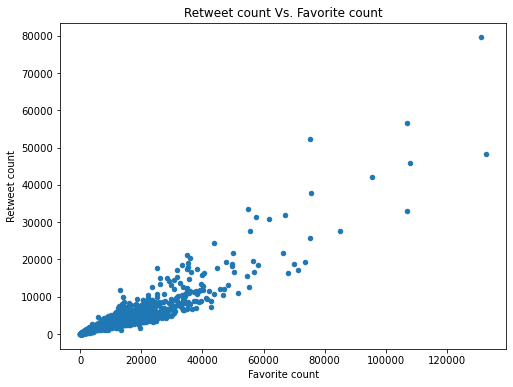

In [369]:
clean_merged.plot(x='favorite_count', y='retweet_count', kind="scatter", figsize=(8,6))
plt.title('Retweet count Vs. Favorite count')
plt.xlabel('Favorite count')
plt.ylabel('Retweet count')

This visualization shows us that there is a strong positive correlation between Retweet count and Favorite count, which indicates that there is a such evidence when someone favorite a tweet he is more likely to retweet this tweet, so as the favorite count increases, the retweet count will increase as well. 